# Student Performance Analysis using CRISP-DM practices

For this project I decided to analyse the Wine Rating dataset found on Kaggle: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance using the CRISP-DM Process of:

Business Understanding
Data Understanding
Prepare Data
Data Modeling
Evaluate the Results
Deploy

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv('study_performance.csv')
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Exploratory data analysis

In [4]:
# 1. Check for Missing Values
# Display the count of missing values for each column
print(df.isnull().sum())

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64


In [5]:
# 2. Check for Duplicates
# Display the number of duplicate rows
df.duplicated().sum()

0

In [7]:
# 3. Data Type Consistency
# Ensure that scores are integers or floats
# Convert them to float if they are not, assuming 'math score', 'reading score', and 'writing score' need to be numeric
df['math_score'] = df['math_score'].astype(float)
df['reading_score'] = df['reading_score'].astype(float)
df['writing_score'] = df['writing_score'].astype(float)

In [10]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


In [12]:
mean = df[['math_score', 'reading_score', 'writing_score']].mean()

median = df[['math_score', 'reading_score', 'writing_score']].median()

mode = df[['math_score', 'reading_score', 'writing_score']].mode().iloc[0]

In [14]:
ranges = df[['math_score', 'reading_score', 'writing_score']].apply(lambda x: x.max() - x.min())

std_dev = df[['math_score', 'reading_score', 'writing_score']].std()

In [15]:
ranges

math_score       100.0
reading_score     83.0
writing_score     90.0
dtype: float64

In [16]:
std_dev

math_score       15.163080
reading_score    14.600192
writing_score    15.195657
dtype: float64

#### Compare scores based on different categorical race/ethnicity

In [22]:
df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
race_ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [24]:
df.groupby('lunch')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [28]:
# Checking the correlation between scores
df[['math_score', 'reading_score', 'writing_score']].corr()

,math_score,reading_score,writing_score
math_score,1.000000,0.817580,0.802642
reading_score,0.817580,1.000000,0.954598
writing_score,0.802642,0.954598,1.000000


## Q1: How does the gender of students affect their performance in math, reading, and writing?

In [29]:
import scipy.stats as stats

In [18]:
df.groupby('gender')[['math_score', 'reading_score', 'writing_score']].mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


The difference in gendered average scores is quite significant, it goes along the long held stereotype that males do better at math and females do better at languages.
Let the null hypothesis be that females have higher averages than males in math, and males have higher averages in language.

In [30]:
# Perform t-tests to compare the means between genders for each subject
# Math score comparison
math_ttest = stats.ttest_ind(df[df['gender'] == 'male']['math_score'],
                             df[df['gender'] == 'female']['math_score'])

# Reading score comparison
reading_ttest = stats.ttest_ind(df[df['gender'] == 'male']['reading_score'],
                                df[df['gender'] == 'female']['reading_score'])

# Writing score comparison
writing_ttest = stats.ttest_ind(df[df['gender'] == 'male']['writing_score'],
                                df[df['gender'] == 'female']['writing_score'])

In [32]:
print(math_ttest.pvalue)
print(reading_ttest.pvalue)
print(writing_ttest.pvalue)

9.120185549328822e-08
4.680538743933289e-15
2.019877706867934e-22


The p-value, as expected is less than the default significance level of 0.05, which indicates that the probability of such an extreme outcome is close to zero and that the null hypothesis can be rejected.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/593154592.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="math_score", data=df, palette="coolwarm", ax=axes[0])
/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/593154592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="reading_score", data=df, palette="coolwarm", ax=axes[1])
/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/593154592.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gender", y="writing_sco

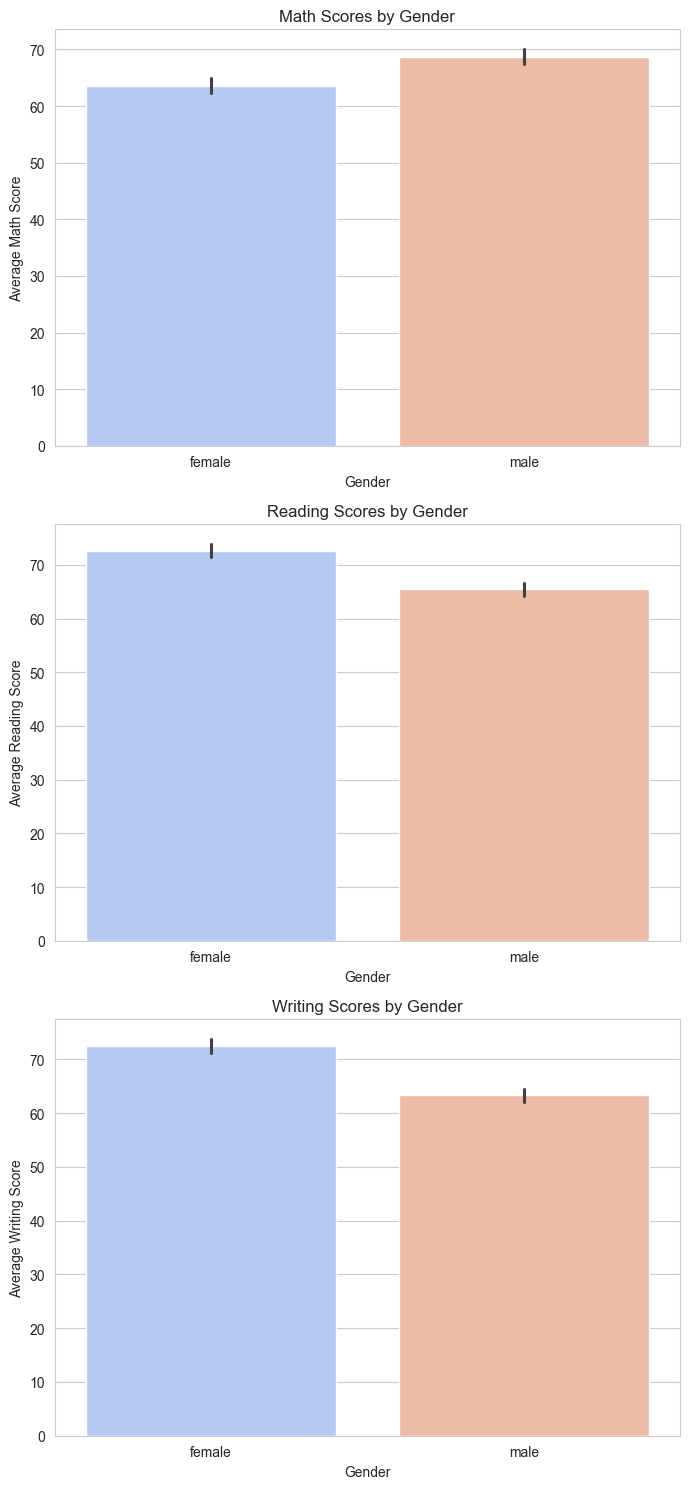

In [37]:
sns.set_style("whitegrid")
f, axes = plt.subplots(3, 1, figsize=(7, 15))

# Bar plot for math scores
sns.barplot(x="gender", y="math_score", data=df, palette="coolwarm", ax=axes[0])
axes[0].set_title('Math Scores by Gender')
axes[0].set_ylabel('Average Math Score')
axes[0].set_xlabel('Gender')

# Bar plot for reading scores
sns.barplot(x="gender", y="reading_score", data=df, palette="coolwarm", ax=axes[1])
axes[1].set_title('Reading Scores by Gender')
axes[1].set_ylabel('Average Reading Score')
axes[1].set_xlabel('Gender')

# Bar plot for writing scores
sns.barplot(x="gender", y="writing_score", data=df, palette="coolwarm", ax=axes[2])
axes[2].set_title('Writing Scores by Gender')
axes[2].set_ylabel('Average Writing Score')
axes[2].set_xlabel('Gender')

# Adjust the layout
plt.tight_layout()
plt.show()

## Q2: Does the level of parental education influence student performance across subjects?

In [41]:
parental_level = df.groupby('parental_level_of_education')[['math_score', 'reading_score', 'writing_score']].mean()
parental_level

,math_score,reading_score,writing_score
parental_level_of_education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/1466402299.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='math_score', y='parental_level_of_education', data=parental_level, palette='viridis')


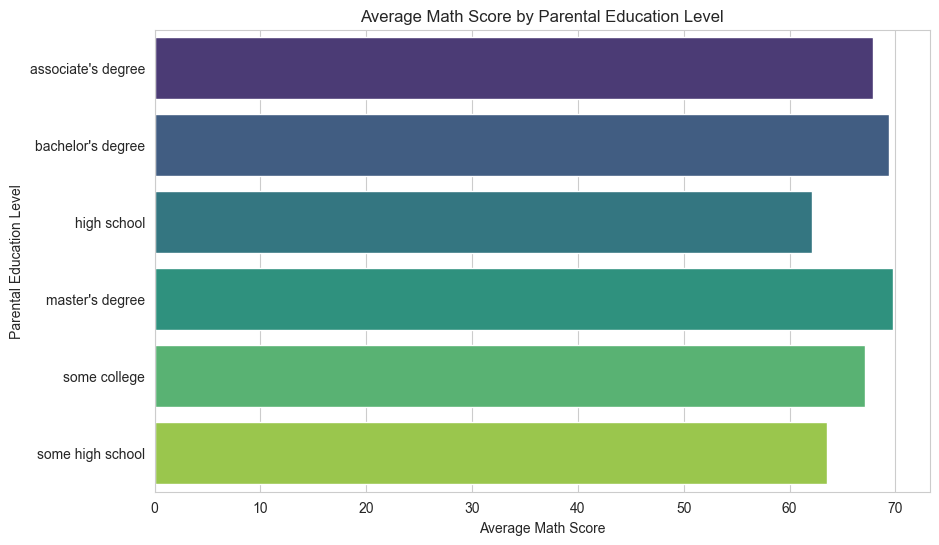

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x='math_score', y='parental_level_of_education', data=parental_level, palette='viridis')
plt.title('Average Math Score by Parental Education Level')
plt.xlabel('Average Math Score')
plt.ylabel('Parental Education Level')
plt.show()

/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/1316021598.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='reading_score', y='parental_level_of_education', data=parental_level, palette='viridis')


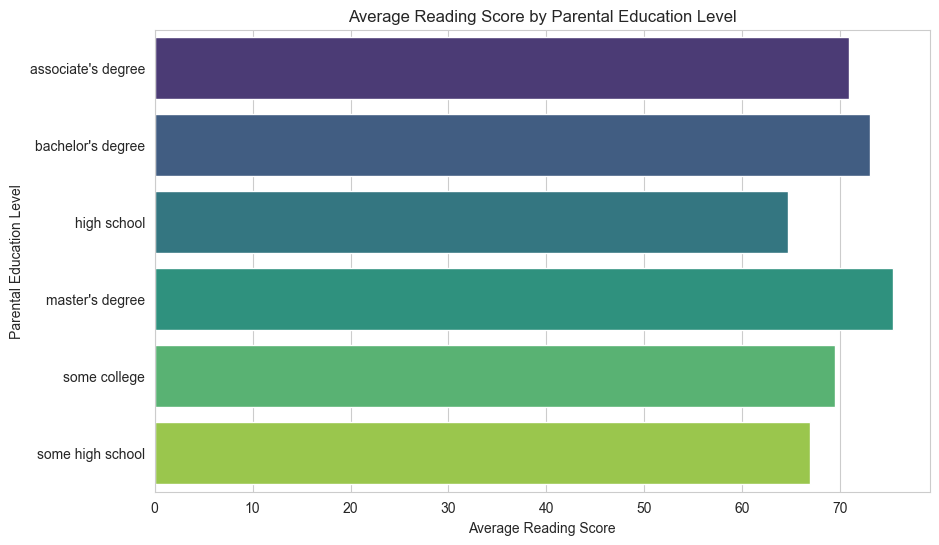

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='reading_score', y='parental_level_of_education', data=parental_level, palette='viridis')
plt.title('Average Reading Score by Parental Education Level')
plt.xlabel('Average Reading Score')
plt.ylabel('Parental Education Level')
plt.show()


/var/folders/4q/wnhf1k5j52g6ds66bkvmcyj80000gn/T/ipykernel_8400/1558403026.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='writing_score', y='parental_level_of_education', data=parental_level, palette='viridis')


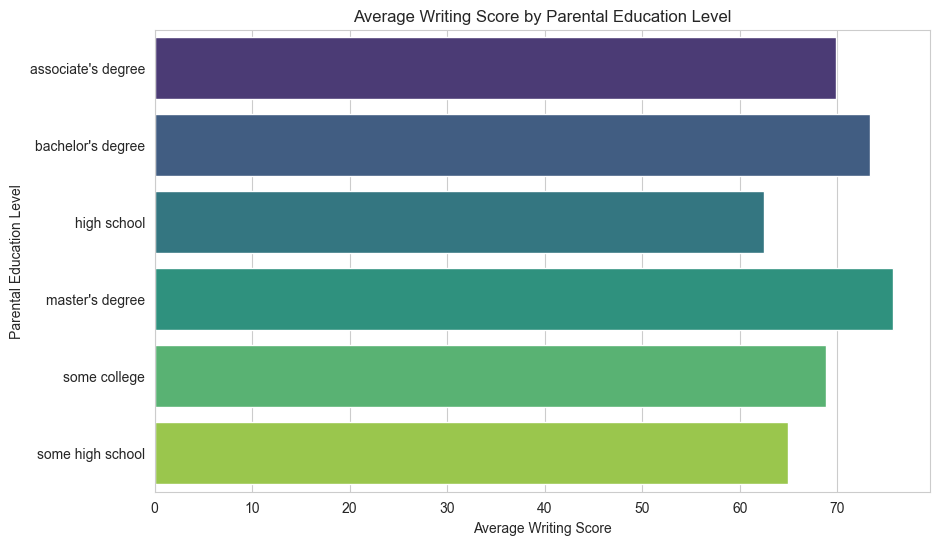

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='writing_score', y='parental_level_of_education', data=parental_level, palette='viridis')
plt.title('Average Writing Score by Parental Education Level')
plt.xlabel('Average Writing Score')
plt.ylabel('Parental Education Level')
plt.show()

From the following visualisations, we can make a conclusion that on an average having parents who undertook higher education makes a student more likely to perform better at tests.

## How does participation in a test preparation course impact student scores?

In [56]:
test_prep = df.groupby('test_preparation_course')[['math_score', 'reading_score', 'writing_score']].mean().reset_index()
test_prep

,test_preparation_course,math_score,reading_score,writing_score
0,completed,69.695531,73.893855,74.418994
1,none,64.077882,66.534268,64.504673


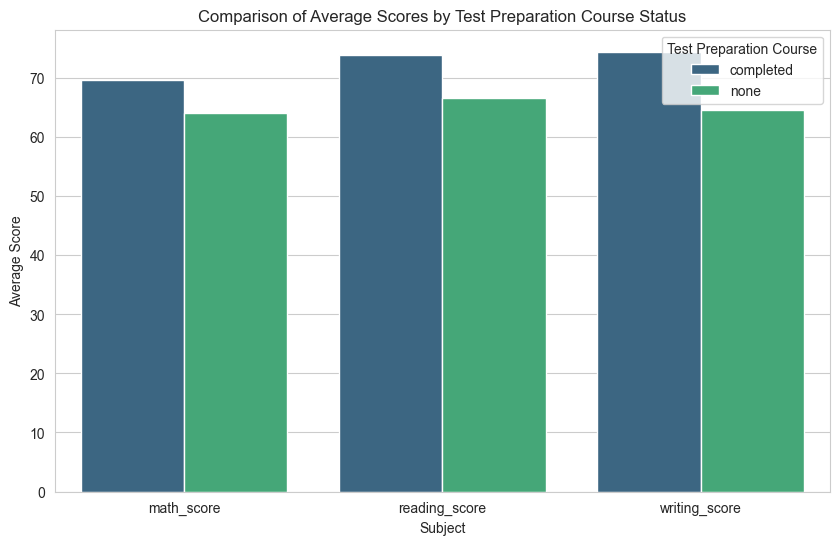

In [57]:
melted_data = pd.melt(test_prep, id_vars=['test_preparation_course'], var_name='Subject', value_name='Average Score')

# Creating the double bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Average Score', hue='test_preparation_course', data=melted_data, palette='viridis')
plt.title('Comparison of Average Scores by Test Preparation Course Status')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.legend(title='Test Preparation Course')
plt.show()

Clearly, taking a preparatory course helps in getting a higher score, although not by too much.